For univariate: https://www.kaggle.com/abigcleverdog/ml-algorithm-implementation-linear-reg-univariate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a testing data pair
x = pd.DataFrame([[1,4],[2,5],[3,6],[3,6]])
y = pd.DataFrame([8,9,12,12])

#### Gradient Descent approach
number of features, n = 2 for the testing data; number of training examples, m = 4
- hyphothesis $h_\theta$: $h_\theta = \theta_0 \cdot x[0] + \theta_1 \cdot x[1] + \theta_2 \cdot x[2] $ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;      *x[0] = 1 is a constant term that added to each train data*
- cost function $J(\theta_0, \theta_1, \theta_2)$: $J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^i) - y^i)^2$  &nbsp; &nbsp;     *it is similar to the average of SSE (Sum of Squared Error) $SSE = \sum_{i=1}^{m}(y_i - \bar{y})^2$* **the difference is $h_\theta(x_i)$ replaced $\bar{y}$**, thus minimize cost function is the same as minimize the error, leading to the best fit
- gradient descent: $\theta_j = \theta_j - \alpha\cdot\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1, \theta_2)$
    - $\theta_j$ is the $j^{th}$ parameter/feature
    - $\alpha$ is the learning rate
    - $\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1, \theta_2)$ is the partial derivative of the cost function (error) over the $j^{th}$ parameter, this term will become zero when all parameters are optimized.
    - each iteration we adjust $\theta_j$ according to the derivative by the scale of the learning rate $\alpha$
        - when $\alpha$ is too small, it can takes long time for the cost function value to decrease to minimal
        - when $\alpha$ is too big, the cost function value can pass the local minimal and swag around and fail to converge
- gradient descent after taking derivative: $\theta_j = \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} [(h_\theta (x^i) - y^i) x_j^i]$
- gradient descent break down to each parameter: \begin{align}
 \theta_0 & = \theta_0 - \alpha \frac{1}{k} \sum_{i=1}^{k} (h_\theta(x^{i}) - y^{i}) \\  
\theta_1 & = \theta_1 - \alpha \frac{1}{k} \sum_{i=1}^{k} ((h_\theta(x^{i}) - y^{i}) \cdot x_1^{i}) \\
\theta_2 & = \theta_2 - \alpha \frac{1}{k} \sum_{i=1}^{k} ((h_\theta(x^{i}) - y^{i}) \cdot x_2^{i}) \\
\end{align}


In [3]:
# iterative implementation. This is more intuitive as we are simply mapping the gradient descent step by step

def cal_sum(h, x, y):
    sum0 = sum1 = sum2 = 0
    for i in range(len(y)):
        sum0 += (h(x.iloc[i,:]) - y[i])
        sum1 += (h(x.iloc[i,:]) - y[i]) * x.iloc[i,0]
        sum2 += (h(x.iloc[i,:]) - y[i]) * x.iloc[i,1]
    return sum0, sum1, sum2

def cal_cost(h, x, y):
    j = 0
    for i in range(len(x)):
        j += (h(x.iloc[i,:]) - y[i]) ** 2
    return j / (2 * len(y))

def lrdg_iterative(theta, x, y, lr, epochs):
    theta_0, theta_1, theta_2 = theta
    h = lambda x: theta_0 + theta_1 * x[0] + theta_2 * x[1] # hypothesis
    paras, costs = [], []
    for i in range(epochs):
        sum0, sum1, sum2 = cal_sum(h, x, y[0])
        theta_0 -= lr / len(y) * sum0
        theta_1 -= lr / len(y) * sum1
        theta_2 -= lr / len(y) * sum2
        paras.append((theta_0, theta_1, theta_2))
        costs.append(cal_cost(h, x, y[0]))
    return paras, costs

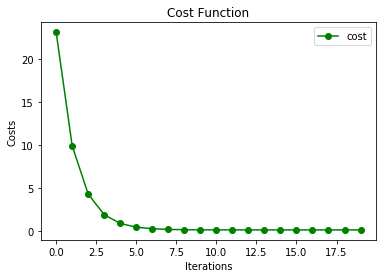

In [4]:
theta = [0,0,0]
lr = 0.01 # learning rate
epochs = 20
it_paras, it_costs = lrdg_iterative(theta, x, y, lr, epochs)
plt.plot(it_costs, 'go-', label='cost')
plt.legend()
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Cost Function');

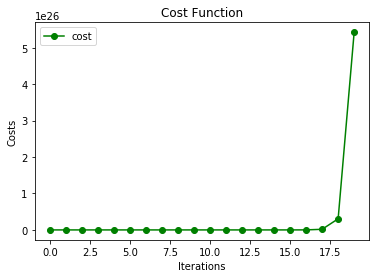

In [5]:
theta = [0,0,0]
lr = 0.15 # learning rate too big, and cost function will not converge
epochs = 20
bi_paras, bi_costs = lrdg_iterative(theta, x, y, lr, epochs)
plt.plot(bi_costs, 'go-', label='cost')
plt.legend()
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Cost Function');

In [6]:
%timeit _, _ = lrdg_iterative(theta, x, y, lr, epochs)

104 ms ± 7.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
# implementation with linear algebra
# for quick review of linear algebra relavent to this part: https://www.holehouse.org/mlclass/03_Linear_algebra_review.html; https://www.youtube.com/watch?v=Dft1cqjwlXE&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=13&t=0s 
def gradientDescent(X, y, theta, alpha, num_iters):
    """
       Performs gradient descent to learn theta
    """
    m = y[0].size  # number of training examples
    paras, costs = [], []
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y)
        paras.append(theta)
        costs.append(cal_cost(lambda x: theta[0] + theta[1]*x[0] + theta[2]*x[1], x, y[0]))
    return theta, paras, costs

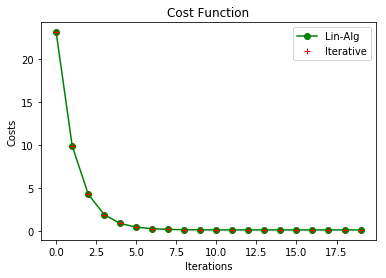

In [8]:
X = pd.concat([pd.DataFrame(np.ones((len(y),1))),x], axis = 1) # adding constant term to each train data
theta = np.zeros((3,1))
epochs = 20 # run 20 single step gd to get cost functions and parameters to compare with the non-linear-algebra approach
lr = 0.01
p, la_paras, la_costs = gradientDescent(X, y, theta, lr, epochs)
plt.plot(la_costs, 'go-', label='Lin-Alg')
plt.plot(it_costs, 'r+', label='Iterative')
plt.legend()
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Cost Function');

In [9]:
%timeit _, _, _ = gradientDescent(X, y, theta, lr, epochs)

70.7 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Implementation with linear algebra yields the same results while taking much less time as `numpy` optimized the calculation under the hood.

#### Normal Equation approach
- hyphothesis $h_\theta$: $h_\theta = \theta_0 \cdot x[0] + \theta_1 \cdot x[1] + \theta_1 \cdot x[2]$
- parameters $\theta = (X^T X)^{-1} X^T y$

In [10]:
def normalEquation(X, y):
    m = len(y)
    theta = []
    
    # Calculating theta
    theta = np.linalg.pinv(X.T.dot(X))  ### Please note using np.linalg.inv will sometime yield wrong outcomes
    theta = theta.dot(X.T)
    theta = theta.dot(y)

    return theta

In [11]:
ne_para = normalEquation(X,y)
ne_cost = cal_cost(lambda x: ne_para[0] + ne_para[1]*x[0] + ne_para[2]*x[1], x, y[0])

In [12]:
%timeit _ = normalEquation(X,y)

1.23 ms ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
compare_df = pd.DataFrame([np.append(ne_cost, ne_para), 
                           np.append(it_costs[-1], it_paras[-1]), 
                           np.append(la_costs[-1], la_paras[-1])],
                         index = ['Normal Equation', 'Iterative 20 It', 'Linear Algebra 20 It'],
                         columns = ['Cost', 'theta_0', 'theta_1', 'theta_2'])
compare_df['timeit (ms)'] = pd.Series([1.22, 95.4, 67.7], index = compare_df.index)
compare_df

,Cost,theta_0,theta_1,theta_2,timeit (ms)
Normal Equation,0.090909,0.438017,0.388430,1.702479,1.22
Iterative 20 It,0.104369,0.299873,0.692683,1.592302,95.40
Linear Algebra 20 It,0.104369,0.299873,0.692683,1.592302,67.70


Apparently, the Normal Equation approach is outperforming the Gradient Descent approach in this small data set. As suggested by Andrew Ng, we should start considering Gradient Descent over the Normal Equation when training example > 10000 and calculation of inverse of the large matrix can be expensive.



Now let's see the functions working on some real data:

In [14]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [15]:
df = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [16]:
df.rename(columns={'suicides/100k pop': 'suicides_per_100k_pop',
                  ' gdp_for_year ($) ': 'gdp_for_year',
                  'gdp_per_capita ($)': 'gdp_per_capita'}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [17]:
country_rate = df.groupby('country').suicides_per_100k_pop.mean().reset_index()
country_gdp_cap = df.groupby('country').gdp_per_capita.mean().reset_index()
country_pop = df.groupby('country').population.mean().reset_index()
new_df = pd.merge(country_rate, country_gdp_cap, on='country')
new_df = pd.merge(new_df, country_pop, on='country')
new_df

,country,suicides_per_100k_pop,gdp_per_capita,population
0,Albania,3.502879,1859.045455,2.360813e+05
1,Antigua and Barbuda,0.552901,10448.185185,6.142679e+03
2,Argentina,10.469328,7914.096774,2.784907e+06
3,Armenia,3.275872,1873.919463,2.595576e+05
4,Aruba,9.503095,24221.642857,7.498077e+03
...,...,...,...,...
96,United Arab Emirates,1.317917,42162.000000,5.069760e+05
97,United Kingdom,7.502473,31908.354839,4.674107e+06
98,United States,13.819812,39269.612903,2.165061e+07
99,Uruguay,19.461190,7622.071429,2.502052e+05


In [18]:
new_df['gdp_per_capita'] /= 100000   # too large x values send the y values out of normal range and cause calculation errors
new_df['population'] /= 100000000
new_df

,country,suicides_per_100k_pop,gdp_per_capita,population
0,Albania,3.502879,0.018590,0.002361
1,Antigua and Barbuda,0.552901,0.104482,0.000061
2,Argentina,10.469328,0.079141,0.027849
3,Armenia,3.275872,0.018739,0.002596
4,Aruba,9.503095,0.242216,0.000075
...,...,...,...,...
96,United Arab Emirates,1.317917,0.421620,0.005070
97,United Kingdom,7.502473,0.319084,0.046741
98,United States,13.819812,0.392696,0.216506
99,Uruguay,19.461190,0.076221,0.002502


In [19]:
x = new_df[['gdp_per_capita', 'population']]
y = pd.DataFrame(list(new_df.suicides_per_100k_pop))

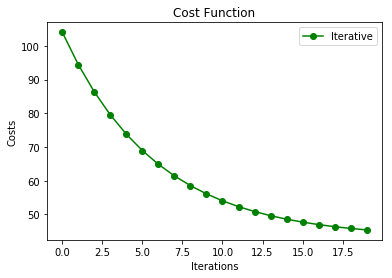

In [20]:
theta = [0,0,0]
lr = 0.08 # learning rate
epochs = 20
it_paras, it_costs = lrdg_iterative(theta, x, y, lr, epochs)
plt.plot(it_costs, 'go-', label='Iterative')
plt.legend()
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Cost Function');

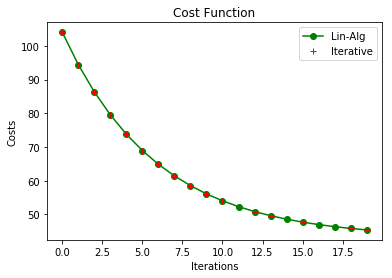

In [21]:
X = pd.concat([pd.DataFrame(np.ones((len(y[0]),1))),x], axis = 1) # adding constant term to each train data
theta = np.zeros((3,1))
epochs = 20 # run 20 single step gd to get cost functions and parameters to compare with the non-linear-algebra approach
lr = 0.08
p, la_paras, la_costs = gradientDescent(X, y, theta, lr, epochs)
plt.plot(la_costs, 'go-', label='Lin-Alg')
plt.plot(it_costs, 'r+', label='Iterative')
plt.legend()
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Cost Function');

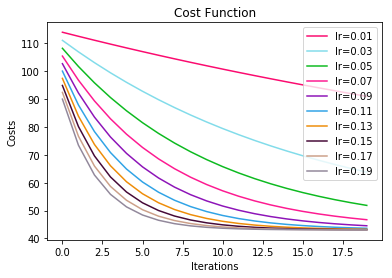

In [22]:
costs_vs_lr = []
for i in range(10):
    lr = 0.01 + i * 0.02
    theta = np.zeros((3,1))
    epochs = 20 # run 20 single step gd to get cost functions and parameters to compare with the non-linear-algebra approach
    p, _paras, _costs = gradientDescent(X, y, theta, lr, epochs)
    costs_vs_lr.append(_costs)

for i, costs in enumerate(costs_vs_lr):    
    color = list(np.random.random(size=3))
    plt.plot(range(20), costs, c = color, label='lr={:.2f}'.format(0.01 + i * 0.02))
plt.ylabel('cost')
plt.legend()
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Cost Function');

In [23]:
ne_para = normalEquation(X,y)
ne_cost = cal_cost(lambda x: ne_para[0] + ne_para[1]*x[0] + ne_para[2]*x[1], x, y[0])
print(ne_cost, it_costs[-1], la_costs[-1])
print(ne_para, it_paras[-1], la_paras[-1])

[42.67905055] 45.40899256109702 [45.40899256]
[[11.30774931]
 [ 1.75269159]
 [28.15013571]] (9.604756346067578, 1.581314303536015, 0.1940886691982835) [[9.60475635]
 [1.5813143 ]
 [0.19408867]]


In [24]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
reg = linReg.fit(x, y)
sk_cost = cal_cost(lambda x: reg.intercept_ + reg.coef_[0][0] *x[0] + reg.coef_[0][1]*x[1], x, y[0])
print(reg.coef_, ne_para)
print(sk_cost, ne_cost)

[[ 1.75269159 28.15013571]] [[11.30774931]
 [ 1.75269159]
 [28.15013571]]
[42.67905055] [42.67905055]


In [25]:
%timeit _, _ = lrdg_iterative(theta, x, y, lr, epochs)

2.51 s ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit _, _, _ = gradientDescent(X, y, theta, lr, epochs)

651 ms ± 6.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit _ = normalEquation(X,y)

1.08 ms ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%timeit _ = linReg.fit(x, y)

2.07 ms ± 76.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
compare_df = pd.DataFrame([np.append(it_costs[-1], it_paras[-1]), 
                           np.append(la_costs[-1], la_paras[-1]), 
                           np.append(ne_cost, ne_para), 
                           np.append([sk_cost, reg.intercept_], reg.coef_[0])],
                         index = ['Iterative 20 It', 'Linear Algebra 20 It', 'Normal Equation', 'SKLearn'],
                         columns = ['Cost', 'theta_0', 'theta_1', 'theta_2'])
compare_df['timeit (ms)'] = pd.Series([2460, 647, 1.06, 2.27], index = compare_df.index)
compare_df

,Cost,theta_0,theta_1,theta_2,timeit (ms)
Iterative 20 It,45.408993,9.604756,1.581314,0.194089,2460.00
Linear Algebra 20 It,45.408993,9.604756,1.581314,0.194089,647.00
Normal Equation,42.679051,11.307749,1.752692,28.150136,1.06
SKLearn,42.679051,11.307749,1.752692,28.150136,2.27
